In [57]:
import pyforest
import warnings
warnings.filterwarnings('ignore')
# import seaborn as sns
# %matplotlib inline

In [2]:
df=pd.read_csv("E:/cIN/Imarticus/HousePrices.csv")

<IPython.core.display.Javascript object>

In [3]:
df

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,RL,NaN,8755,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,GdPrv,NaN,0,6,2009,WD,Normal,214000
2069,943,90,RL,63.0,7711,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,Oth,Abnorml,150000
2070,944,90,RL,313.0,25000,Pave,NaN,Reg,Low,AllPub,...,0,NaN,NaN,NaN,0,6,2007,WD,Normal,143000
2071,945,20,RL,52.0,14375,Pave,NaN,IR1,Lvl,NoSeWa,...,0,NaN,NaN,NaN,0,1,2009,COD,Abnorml,137500


In [4]:
df.columns

Index(['Id', 'Dwell_Type', 'Zone_Class', 'LotFrontage', 'LotArea', 'Road_Type',
       'Alley', 'Property_Shape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [6]:
df.select_dtypes(include=np.number).columns

<IPython.core.display.Javascript object>

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [7]:
df.select_dtypes(include='object').columns

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [8]:
df.isna().sum().head(40)

Id                   0
Dwell_Type           0
Zone_Class           0
LotFrontage        320
LotArea              0
Road_Type            0
Alley             1944
Property_Shape       0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
Dwelling_Type        0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType          14
MasVnrArea          14
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual            59
BsmtCond            59
BsmtExposure        61
BsmtFinType1        59
BsmtFinSF1           0
BsmtFinType2        60
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
dtype: int64

Checking missing values percentage

In [9]:
num_per_values=df.isna().sum()*100/2073
num_per_values.tail(60)

RoofStyle               0.000000
RoofMatl                0.000000
Exterior1st             0.000000
Exterior2nd             0.000000
MasVnrType              0.675350
MasVnrArea              0.675350
ExterQual               0.000000
ExterCond               0.000000
Foundation              0.000000
BsmtQual                2.846117
BsmtCond                2.846117
BsmtExposure            2.942595
BsmtFinType1            2.846117
BsmtFinSF1              0.000000
BsmtFinType2            2.894356
BsmtFinSF2              0.000000
BsmtUnfSF               0.000000
TotalBsmtSF             0.000000
Heating                 0.000000
HeatingQC               0.000000
CentralAir              0.000000
Electrical              0.048239
1stFlrSF                0.000000
2ndFlrSF                0.000000
LowQualFinSF            0.000000
GrLivArea               0.000000
BsmtFullBath            0.000000
BsmtHalfBath            0.000000
FullBath                0.000000
HalfBath                0.000000
BedroomAbv

In [10]:
#replacing numeric null values with median

In [11]:
m1=df['LotFrontage'].astype('float').median(axis=0)
m1
df['LotFrontage'].replace(np.nan,m1,inplace=True)

<IPython.core.display.Javascript object>

In [12]:
median1=df['GarageYrBlt'].astype('float').median(axis=0)
median1
df['GarageYrBlt'].replace(np.nan,median1,inplace=True)

<IPython.core.display.Javascript object>

In [13]:
median2=df['MasVnrArea'].astype('float').median(axis=0)
median1
df['MasVnrArea'].replace(np.nan,median1,inplace=True)

<IPython.core.display.Javascript object>

In [14]:
df.isna().sum().head(50)

Id                   0
Dwell_Type           0
Zone_Class           0
LotFrontage          0
LotArea              0
Road_Type            0
Alley             1944
Property_Shape       0
LandContour          0
Utilities            0
LotConfig            0
LandSlope            0
Neighborhood         0
Condition1           0
Condition2           0
Dwelling_Type        0
HouseStyle           0
OverallQual          0
OverallCond          0
YearBuilt            0
YearRemodAdd         0
RoofStyle            0
RoofMatl             0
Exterior1st          0
Exterior2nd          0
MasVnrType          14
MasVnrArea           0
ExterQual            0
ExterCond            0
Foundation           0
BsmtQual            59
BsmtCond            59
BsmtExposure        61
BsmtFinType1        59
BsmtFinSF1           0
BsmtFinType2        60
BsmtFinSF2           0
BsmtUnfSF            0
TotalBsmtSF          0
Heating              0
HeatingQC            0
CentralAir           0
Electrical           1
1stFlrSF   

In [15]:
C=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','GarageCond',
     'GarageType','GarageFinish','GarageQual','BsmtExposure','BsmtFinType2','BsmtFinType1',
     'BsmtCond','BsmtQual','MasVnrType','Electrical']

In [16]:
for v in C:
    print(v)
    print(df[v].value_counts(dropna=False))
    print()

PoolQC
NaN    2065
Gd        4
Fa        2
Ex        2
Name: PoolQC, dtype: int64

MiscFeature
NaN     1993
Shed      74
Othr       3
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

Alley
NaN     1944
Grvl      72
Pave      57
Name: Alley, dtype: int64

Fence
NaN      1669
MnPrv     233
GdPrv      88
GdWo       69
MnWw       14
Name: Fence, dtype: int64

FireplaceQu
NaN    988
Gd     530
TA     457
Fa      40
Ex      33
Po      25
Name: FireplaceQu, dtype: int64

GarageCond
TA     1885
NaN     113
Fa       47
Gd       17
Po        8
Ex        3
Name: GarageCond, dtype: int64

GarageType
Attchd     1252
Detchd      537
BuiltIn     124
NaN         113
Basment      27
CarPort      12
2Types        8
Name: GarageType, dtype: int64

GarageFinish
Unf    857
RFn    605
Fin    498
NaN    113
Name: GarageFinish, dtype: int64

GarageQual
TA     1870
NaN     113
Fa       65
Gd       18
Ex        4
Po        3
Name: GarageQual, dtype: int64

BsmtExposure
No     1349
Av      322
Gd      

In [17]:
#replacing values with most frequest values i.e. mode

In [18]:
df=df.fillna({'PoolQC':'NONE','MiscFeature':'None','Alley':'None','Fence':'None','FireplaceQu':'Gd',
   'GarageCond':'Fa','GarageType':'Detchd','GarageFinish':'Unf','GarageQual':'TA','BsmtExposure':'No',
   'BsmtFinType2':'Unf','BsmtFinType1':'Unf',
     'BsmtCond':'TA','BsmtQual':'Gd','MasVnrType':'BrkFace','Electrical':'SBrkr'})

In [19]:
df.isna().sum().head(50)

Id                0
Dwell_Type        0
Zone_Class        0
LotFrontage       0
LotArea           0
Road_Type         0
Alley             0
Property_Shape    0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
Dwelling_Type     0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2      0
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0


In [20]:
df.isna().sum().tail(40)

CentralAir             0
Electrical             0
1stFlrSF               0
2ndFlrSF               0
LowQualFinSF           0
GrLivArea              0
BsmtFullBath           0
BsmtHalfBath           0
FullBath               0
HalfBath               0
BedroomAbvGr           0
KitchenAbvGr           0
KitchenQual            0
TotRmsAbvGrd           0
Functional             0
Fireplaces             0
FireplaceQu            0
GarageType             0
GarageYrBlt            0
GarageFinish           0
GarageCars             0
GarageArea             0
GarageQual             0
GarageCond             0
PavedDrive             0
WoodDeckSF             0
OpenPorchSF            0
EnclosedPorch          0
3SsnPorch              0
ScreenPorch            0
PoolArea               0
PoolQC                 0
Fence                  0
MiscFeature            0
MiscVal                0
MoSold                 0
YrSold                 0
SaleType               0
SaleCondition          0
Property_Sale_Price    0


In [21]:
df.select_dtypes(include=['object']).columns

Index(['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [22]:
#Encoding

In [23]:
cat_dummies=pd.get_dummies(df[['Zone_Class', 'Road_Type', 'Alley', 'Property_Shape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']])

<IPython.core.display.Javascript object>

In [24]:
cat_dummies

,Zone_Class_C (all),Zone_Class_FV,Zone_Class_RH,Zone_Class_RL,Zone_Class_RM,Road_Type_Grvl,Road_Type_Pave,Alley_Grvl,Alley_None,Alley_Pave,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2069,0,0,0,1,0,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0
2070,0,0,0,1,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,1,0
2071,0,0,0,1,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [25]:
df.select_dtypes(include=np.number).columns

<IPython.core.display.Javascript object>

Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'Property_Sale_Price'],
      dtype='object')

In [26]:
price_nume=df[['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold','Property_Sale_Price']]

In [27]:
price_nume

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,Property_Sale_Price
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,942,60,70.0,8755,8,4,1936,1999,298.0,772,...,0,0,0,168,0,0,0,6,2009,214000
2069,943,90,63.0,7711,6,9,1936,1977,0.0,1440,...,321,0,0,0,0,0,0,8,2007,150000
2070,944,90,313.0,25000,4,6,1983,1996,0.0,0,...,0,0,0,0,0,0,0,6,2007,143000
2071,945,20,52.0,14375,9,6,1958,1958,541.0,111,...,0,118,0,0,233,0,0,1,2009,137500


In [28]:
#Concatenation

In [29]:
price_combined=pd.concat([price_nume,cat_dummies],axis=1)

<IPython.core.display.Javascript object>

In [30]:
#model buildng

In [40]:
Y=price_combined['Property_Sale_Price']
X= price_combined.drop(columns='Property_Sale_Price')

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)
print(y_test)


1030    160000
1707    208900
635     200000
1301    177500
773     114500
         ...  
1937    159895
117     155000
1782    134900
936     184900
888     268000
Name: Property_Sale_Price, Length: 622, dtype: int64


In [42]:
X_train[:5]

,Id,Dwell_Type,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
654,655,20,91.0,10437,8,6,1995,1995,660.0,1696,...,0,0,0,1,0,0,0,0,1,0
1043,1044,60,86.0,11839,7,5,1990,1990,23.0,1085,...,0,0,0,1,0,0,0,0,1,0
288,289,20,70.0,9819,5,5,1967,1967,58.0,450,...,0,0,0,1,0,0,0,0,1,0
2023,897,30,86.0,8765,9,5,1936,1950,0.0,285,...,0,0,0,1,1,0,0,0,0,0
1429,1430,20,70.0,12546,9,7,1981,1981,310.0,678,...,0,0,0,1,0,0,0,0,1,0


In [43]:
#fitting in model
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [44]:
X_train.shape

(1451, 293)

In [45]:
y_train.shape

(1451,)

In [81]:
print(lm.intercept_)

-745227.4945359335


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  #Find the coefficient of Determination


In [48]:
y_test_pred=lm.predict(X_test)
y_test_pred[:5]

array([126684.94615929, 213899.23722532, 157484.13102775, 178493.11663109,
        97720.63757632])

In [89]:
print(lm.intercept_)

-745227.4945359335


In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score  #Find the coefficient of Determination
print('Mean squared Error for Regression',mean_squared_error(y_test,y_test_pred))
print('Root Mean squared Error for Regression',np.sqrt(mean_squared_error(y_test,y_test_pred)))
print('The coefficient of Determination is',r2_score(y_test,y_test_pred))

Mean squared Error for Regression 848502241.9997337


<IPython.core.display.Javascript object>

Root Mean squared Error for Regression 29129.061811183237
The coefficient of Determination is 0.8428569962963777


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Property_Sale_Price'>

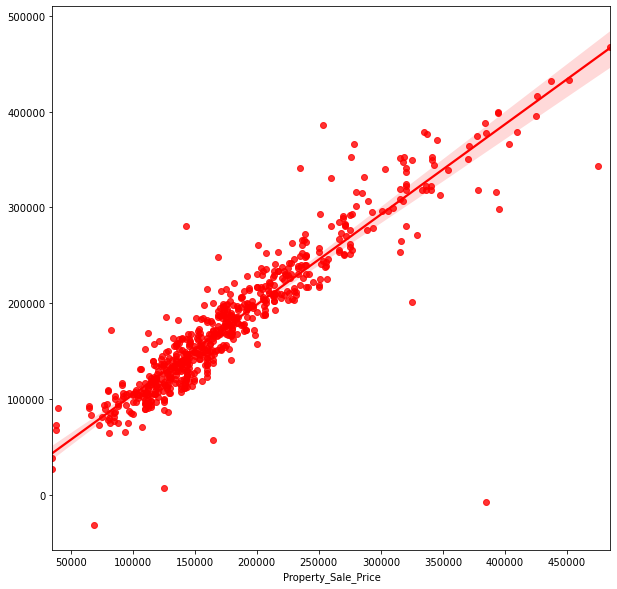

In [55]:
plt.figure(figsize=(10,10))
sns.regplot(x=y_test,y=y_test_pred,data=df,color='Red')

In [53]:
#by OLS
import statsmodels.api as sm 
X_train_sm= X_train
X_train_sm=sm.add_constant(X_train_sm)
lm_1=sm.OLS(y_train,X_train_sm).fit()
print(lm_1.summary())

                             OLS Regression Results                            
Dep. Variable:     Property_Sale_Price   R-squared:                       0.936
Model:                             OLS   Adj. R-squared:                  0.924
Method:                  Least Squares   F-statistic:                     74.22
Date:                 Fri, 15 Oct 2021   Prob (F-statistic):               0.00
Time:                         10:33:52   Log-Likelihood:                -16455.
No. Observations:                 1451   AIC:                         3.339e+04
Df Residuals:                     1210   BIC:                         3.467e+04
Df Model:                          240                                         
Covariance Type:             nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const               

In [54]:
lm.intercept_

-745227.4945359335

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

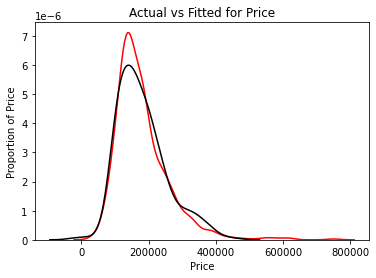

In [58]:
#comparison
ax1=sns.distplot(y_train,hist=False, color='red' ,label='Actual Values')
sns.distplot(y_test_pred,hist=False, color='black', label='Fitted Values', ax=ax1)
plt.title('Actual vs Fitted for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of Price')
plt.show()